# Klasfyfikacja binarna i perceptron

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Klasyfikacja liniowa

SIECI NEURONOWE -- KLOCKI LEGO budujemy z najprostszych elementów.

Chcemy dokonać klasyfikacji.
Mamy punkty $x_i \in \mathbb{R}^n$ dla których klasy $y_i \in \{0,1\}$.
Mając nowy punkt, chcemy przewidzieć jego klasę.

Klasyfikacja liniowa. Szukamy takiego wektora $v=(v_1,\ldots,v_n)$ by poprawna klasyfikacja była zadana przez
$$
x \to v^T x= v_1x_1+\ldots+v_nx_n \to H(v^Tx),
$$
gdzie $H(r)=\{0\text{ if }r\leq 0, \, 1 \text{ otherwise}\}$ funkcja Heaviside. FUNKCJA AKTYWACJI

Zauważmy, że $H(v^Tx)$ przyjmuje tylko wartości $\{0,1\}$.


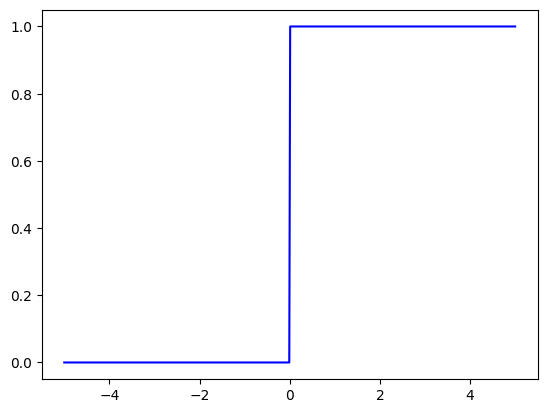

In [ ]:
def heaviside(x):
    """Funkcja Heaviside'a."""
    return np.where(x >= 0, 1, 0)

# Definiowanie zakresu x
x = np.linspace(-5, 5, 500)

# Obliczanie wartości funkcji Heaviside'a
y = heaviside(x)

# Rysowanie wykresu
plt.plot(x, y, label='Heaviside(x)', color='blue')
plt.show()


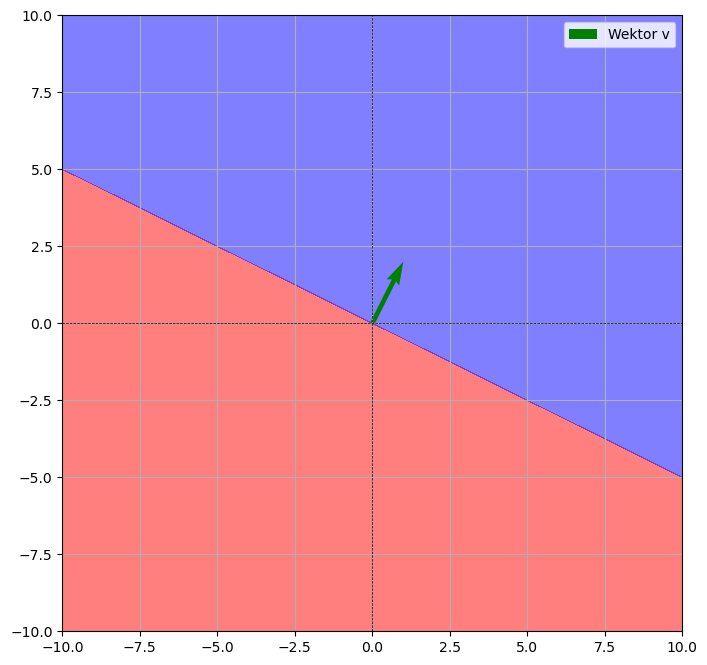

In [ ]:

def visualize_halfspace(v):
    """
    Wizualizuje obszar {x : v^T x > 0} na płaszczyźnie.

    Parameters:
        v (array-like): Wektor o dwóch wymiarach definiujący obszar.
    """
    # Upewnij się, że v jest tablicą numpy
    v = np.array(v)

    if len(v) != 2:
        raise ValueError("Wektor v musi być dwuwymiarowy.")

    # Tworzenie siatki punktów na płaszczyźnie
    x = np.linspace(-10, 10, 400)
    y = np.linspace(-10, 10, 400)
    xx, yy = np.meshgrid(x, y)

    # Obliczanie wartości v^T x dla każdego punktu na siatce
    zz = v[0] * xx + v[1] * yy

    # Wizualizacja
    plt.figure(figsize=(8, 8))
    plt.contourf(xx, yy, zz, levels=[-np.inf, 0, np.inf], colors=['red', 'blue'], alpha=0.5)
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.5, linestyle='--')

    # Wektor v na wykresie
    plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='green', label='Wektor v')

    plt.legend()
    plt.grid()
    plt.show()

# Przykładowe użycie
v = [1, 2]  # Wektor definiujący obszar
visualize_halfspace(v)


Mówimy, że zbiory $X_0,X_1 \subset \mathbb{R}^n$ są separowalne liniowo, jeżeli istnieje $v \in \mathbb{R}^n$ taki, że
$$
v^TX_0 <0, \, v^T X_1 \geq 0
$$
Inaczej mówiąc dla każdego $x_i$ mamy
$$
H(v^T x_i)=y_i.
$$

Przykład zbioru nie separwoalnego liniowo (rozdzielamy O od X):
$$
\begin{array}{cc}
OX \\
XO
\end{array}
$$

Okazuje się, że jeżeli zbiór jest separowalny liniowo, można wypisać jawną strategię uczenia.

## Definicja uczenia perceptronu

Parametry:
* learning rate $=h$ (jak duże updaty robimy)
* epochs $=N$ (ile razy przechodzimy przez cały zbiór)
* losowo wybrany wektora $v$ (można dać na zero) -- wagi sieci.

Uczenie iteracyjne.
* bierzemy $x_i$ o klasie $y_i \in \{0,1\}$
* wyliczamy predykcję modelu $p_i=H(v^Tx_i)$
* Jeżeli punkt $x_i$ jest poprawnie sklasyfikowany, czyli $p_i=y_i$, to nic nie zmieniamy.
* Jeżeli jakiś punkt jest błędnie klasyfikowany, to odpowiednio przesuwamy $v$, jeżeli klasa $x_i$ to jeden, to do $v$ dodajemy $h x_i$, jeżeli $0$ to odejmujemy $h x_i$
[motywacja: zauważmy, że $(v\pm hx_i)^T(x_i)=v^Tx_i \pm h \|x_i\|^2$]

Poprzednie dwa punkty możemy zapisać jako:
  $$
  v =v+h \cdot (y_i-p_i) \cdot x_i.
  $$




In [ ]:
# bazowy perceptron bez biasu

class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=20):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None

    def activation(self, x):
        return 1 if x >= 0 else 0

    def predict(self, X):
        linear_output = np.dot(X, self.weights)
        return np.array([self.activation(x) for x in linear_output])

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)

        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights)
                y_predicted = self.activation(linear_output)

                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i


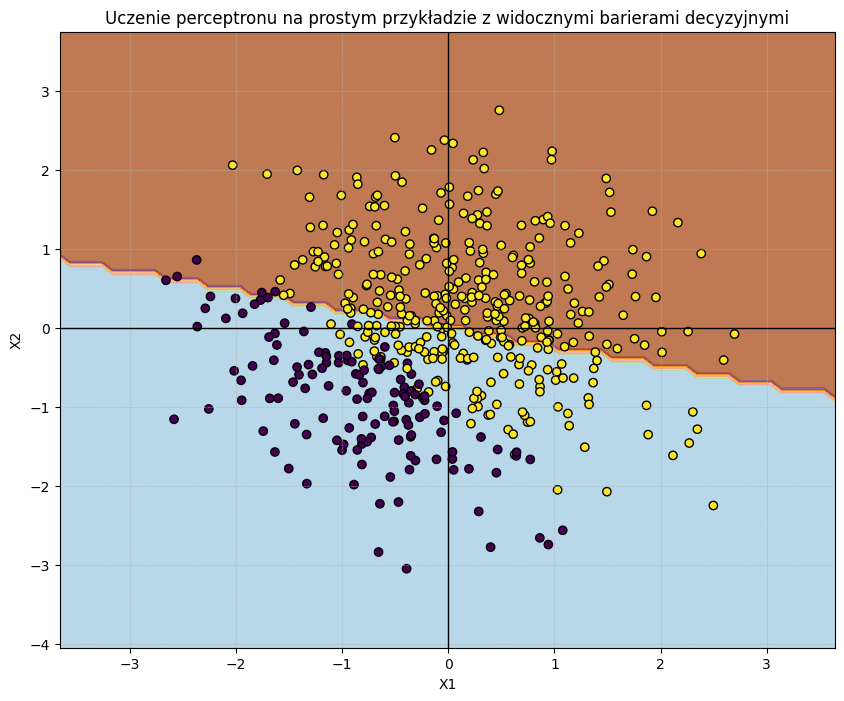

In [ ]:
# Generowanie prostych danych
e=0.2
np.random.seed(0)
X = np.random.randn(500, 2)
y = np.array([1 if x[0] + x[1]> np.random.normal(loc=0, scale=e) else 0 for x in X])
# sytuacja gdy nie ma separowalności przez linię przechodzącą przez zero
# y = np.array([1 if x[0] + x[1]+1> np.random.normal(loc=0, scale=e) else 0 for x in X])

# Trenowanie perceptronu
perceptron = Perceptron(learning_rate=0.1, epochs=10)
perceptron.fit(X, y)

# Wizualizacja wyników z kolejnymi barierami decyzyjnymi
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

plt.figure(figsize=(10, 8))

# Ostateczna bariera decyzyjna
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)

# Punkty danych
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
plt.axhline(0, color='black', linewidth=1, linestyle='-')
plt.axvline(0, color='black', linewidth=1, linestyle='-')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.title("Uczenie perceptronu na prostym przykładzie z widocznymi barierami decyzyjnymi")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()


a co jakby było:

y = np.array([1 if x[0] + x[1] > 0.5+np.random.normal(loc=0, scale=e) else 0 for x in X])


## Rozszerzanie przestrzeni danych by umożliwić barierę postaci
$$
v^Tx+b \leq 0
$$

Rozszerzamy dane z $x$ do $(x,1)$, i na takich rozszerzonych stosujemy model.
W praktyce $v$ ma dodatkową współrzędną, nazywamy ją bias (oznaczam przez $b$).

Wtedy pojawia się update zarówno dla $v$ jak i $b$:
$$
update=h\cdot (y_i -predicted(x_i))
$$
i
$$
v=v+h \cdot update \cdot x_i, \, b=b+update.
$$

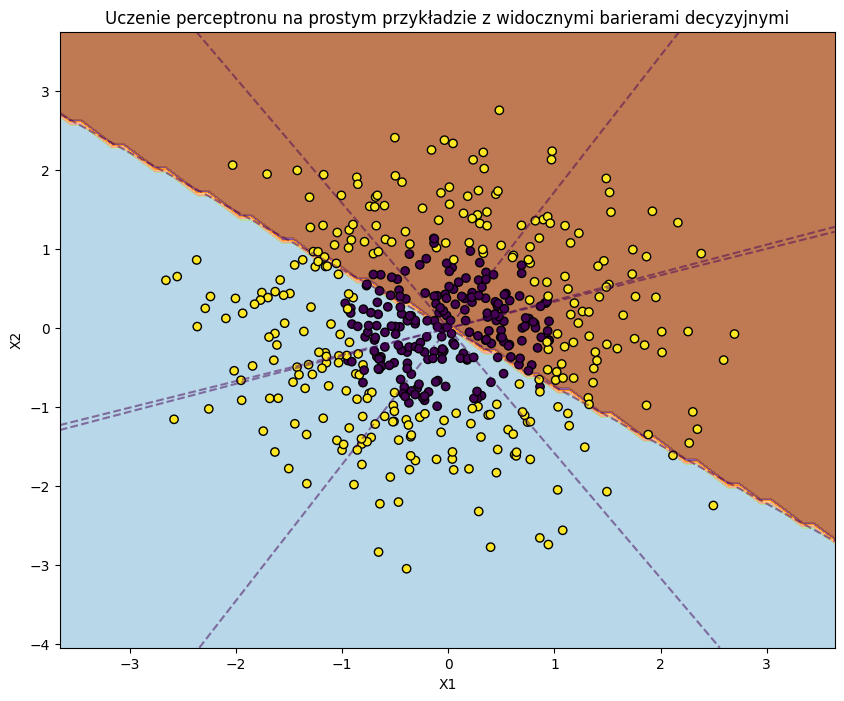

In [ ]:
class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=20):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.history = []  # To store decision boundaries

    def activation(self, x):
        return 1 if x >= 0 else 0

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.array([self.activation(x) for x in linear_output])

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            self.history.append((self.weights.copy(), self.bias))  # Store weights and bias
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation(linear_output)

                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

# Generowanie prostych danych
e=0.2
np.random.seed(0)
X = np.random.randn(500, 2)
y = np.array([1 if x[0] + x[1] +1> np.random.normal(loc=0, scale=e) else 0 for x in X])

# a co jeżeli koło?
# e=0.2
# np.random.seed(0)
# X = np.random.randn(500, 2)
# y = np.array([1 if x[0]**2 + x[1]**2 > 1+np.random.normal(loc=0, scale=e) else 0 for x in X])


# Trenowanie perceptronu
perceptron = Perceptron(learning_rate=0.1, epochs=10)
perceptron.fit(X, y)

# Wizualizacja wyników z kolejnymi barierami decyzyjnymi
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

plt.figure(figsize=(10, 8))

for epoch, (weights, bias) in enumerate(perceptron.history):
    if epoch % 2 == 0 or epoch == len(perceptron.history) - 1:  # Plot every 2 epochs and the last one
        Z = np.dot(np.c_[xx.ravel(), yy.ravel()], weights) + bias
        Z = Z.reshape(xx.shape)
        plt.contour(xx, yy, Z, levels=[0], alpha=0.5, linestyles='--')

# Ostateczna bariera decyzyjna
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)

# Punkty danych
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
plt.title("Uczenie perceptronu na prostym przykładzie z widocznymi barierami decyzyjnymi")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()


# Ocena modelu: zbiór testowy i treningowy, accuracy

Dokładność na zbiorze treningowym: 1.00
Dokładność na zbiorze testowym: 0.99


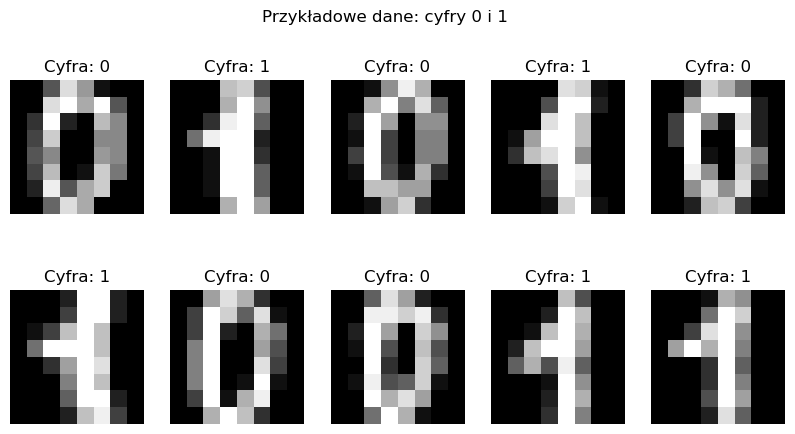

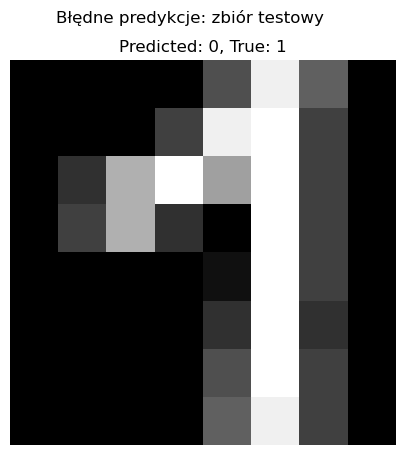

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def activation(self, x):
        return 1 if x >= 0 else 0

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.array([self.activation(x) for x in linear_output])

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation(linear_output)

                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

# Wczytanie zbioru danych
digits = load_digits()
X = digits.data
y = digits.target

# Wybór tylko cyfr 0 i 1
mask = (y == 0) | (y == 1)
X = X[mask]
y = y[mask]

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Trenowanie perceptronu
perceptron = Perceptron(learning_rate=0.01, epochs=100)
perceptron.fit(X_train, y_train)

# Predykcja
y_train_pred = perceptron.predict(X_train)
y_test_pred = perceptron.predict(X_test)

# Obliczanie dokładności
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Dokładność na zbiorze treningowym: {train_acc:.2f}")
print(f"Dokładność na zbiorze testowym: {test_acc:.2f}")

# Identyfikacja błędnych predykcji
train_errors = np.where(y_train != y_train_pred)[0]
test_errors = np.where(y_test != y_test_pred)[0]

# Wizualizacja przykładowych danych
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
fig.suptitle("Przykładowe dane: cyfry 0 i 1")
for ax, image, label in zip(axes.ravel(), X[:10], y[:10]):
    ax.imshow(image.reshape(8, 8), cmap='gray')
    ax.set_title(f"Cyfra: {label}")
    ax.axis('off')
plt.show()

# Wizualizacja błędnych predykcji na zbiorze treningowym
if len(train_errors) > 0:
    fig, axes = plt.subplots(1, min(5, len(train_errors)), figsize=(10, 5))
    fig.suptitle("Błędne predykcje: zbiór treningowy")
    if len(train_errors) == 1:
        axes = [axes]  # Ensure axes is iterable when there's only one plot
    for ax, idx in zip(axes, train_errors):
        ax.imshow(X_train[idx].reshape(8, 8), cmap='gray')
        ax.set_title(f"P: {y_train_pred[idx]}, T: {y_train[idx]}")
        ax.axis('off')
    plt.show()

# Wizualizacja błędnych predykcji na zbiorze testowym
if len(test_errors) > 0:
    fig, axes = plt.subplots(1, min(5, len(test_errors)), figsize=(10, 5))
    fig.suptitle("Błędne predykcje: zbiór testowy")
    if len(test_errors) == 1:
        axes = [axes]  # Ensure axes is iterable when there's only one plot
    for ax, idx in zip(axes, test_errors):
        ax.imshow(X_test[idx].reshape(8, 8), cmap='gray')
        ax.set_title(f"Predicted: {y_test_pred[idx]}, True: {y_test[idx]}")
        ax.axis('off')
    plt.show()


# AUGMENTACJA DANYCH

Jak państwo mogli zauważyć, w przypadku zbiorów separowalnych liniowo model perceptron daje w zależności od początkowej inicjalizacji różne wyniki. W związku z tym powstaje pytanie, która separacja będzie najlepsza. Otóż jednym z podejść, jest zrobienie takiej bariery która jest najdalsza od obu zbiorów (czyli możemy ją maksymalnie nadmuchać, i ciągle będzie rozdzielała).

Równoważnie możemy powiedzieć, że najlepsza bariera to jest ta, która rozdziela poprawnie nadmuchane punkty (czyli zamiast punktów bierzemy kulki).

W praktyce w sieciach stosuje się to podejście używając augmentacji, czyli w trakcie uczenia modelu nie wkładamy punktu do modelu, lecz jego niewielkie (losowe) zaburzenie. Jak nauczymy w ten sposób model, to możemy mieć nadzieję, że będzie lepiej generalizował.

ZADANIE:
proszę napisać taki upgrade modelu perceptrona, by przy uczeniu przyjmował losowe zaburzenia punktów, czylu zastępował punkt x punktem x+noise, gdzie noise pochodzi z rozkładu normalnego o średniej zero, i małym odchyleniu standardowym.

# A co jak się nie da rozdzielić za pomocą liniowego modelu?

Na przykład punkty w kole vs punkty poza kołem?

Rozszerzamy przestrzeń z wejściowej przestrzeni o więcej cech. Losowo wybrane - wybieramy losową macierz o dużym wymiarze i losowy bias, i obkładamy jakąś nieliniowością, na przykład funkcją $relu(x)=\max(0,x)$ albo $\tanh(x)$

Accuracy: 0.97


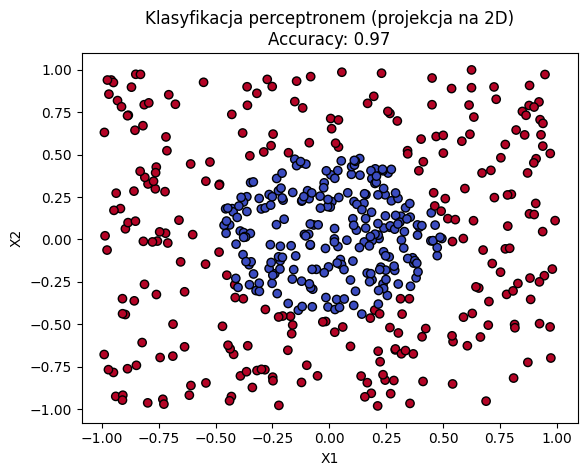

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generowanie danych
# zadbałem o to by klasa była zbalansowana
np.random.seed(42)
def relu(x):
    return np.maximum(0, x)

def generate_data(n_samples=100, embed_dim=5):
    X_inside = []
    X_outside = []
    while len(X_inside) < n_samples // 2 or len(X_outside) < n_samples // 2:
        x, y = np.random.uniform(-1, 1, size=2)
        if np.sqrt(x**2 + y**2) > 0.5 and len(X_outside) < n_samples // 2:
            X_outside.append([x, y])
        elif np.sqrt(x**2 + y**2) <= 0.5 and len(X_inside) < n_samples // 2:
            X_inside.append([x, y])

    X = np.array(X_inside + X_outside)
    y = np.array([0] * (n_samples // 2) + [1] * (n_samples // 2))

    # Zanurzenie w wyższą wymiarowość za pomocą losowej macierzy i ReLU
    W = np.random.randn(2, embed_dim - 2)  # Macierz zanurzenia
    extra_dims = relu(np.dot(X, W))  # Transformacja przez ReLU
    X = np.hstack([X, extra_dims])

    return X, y

# Perceptron
class Perceptron:
    def __init__(self, input_dim, lr=0.1, epochs=100):
        self.weights = np.random.randn(input_dim + 1)  # +1 dla biasu
        self.lr = lr
        self.epochs = epochs

    def predict(self, X):
        X_bias = np.c_[np.ones(X.shape[0]), X]  # Dodanie biasu
        return (np.dot(X_bias, self.weights) > 0).astype(int)

    def train(self, X, y):
        X_bias = np.c_[np.ones(X.shape[0]), X]  # Bias

        for _ in range(self.epochs):
            for i in range(X.shape[0]):
                y_pred = (np.dot(X_bias[i], self.weights) > 0).astype(int)
                self.weights += self.lr * (y[i] - y_pred) * X_bias[i]

    def accuracy(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)

# Test
X, y = generate_data(n_samples=500, embed_dim=200)  # Zbalansowany zbiór
perceptron = Perceptron(input_dim=X.shape[1], lr=0.1, epochs=500)  # Więcej epok dla lepszego dopasowania
perceptron.train(X, y)
y_pred = perceptron.predict(X)
acc = perceptron.accuracy(X, y)
print(f'Accuracy: {acc:.2f}')

# Wizualizacja 2D (tylko pierwsze dwa wymiary)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='coolwarm', edgecolors='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title(f'Klasyfikacja perceptronem (projekcja na 2D)\nAccuracy: {acc:.2f}')
plt.show()
